# **Clustering with categorical and metric data**

To remove the warning messages

In [141]:
import warnings
warnings.filterwarnings('ignore')

In [142]:
import numpy as np
import pandas as pd 

In [143]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/sravanirachamalla/MLA2021/main/titanic.csv")

In [144]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [145]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


To remove the passengerID, Name, Ticket, Cabin and Embarked variable from the dataset

In [146]:
titanic_data = titanic_data.drop('PassengerId', axis=1)


In [147]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
titanic_data = titanic_data.drop('Name', axis=1)


In [149]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
titanic_data = titanic_data.drop('Cabin', axis=1)

In [151]:
titanic_data = titanic_data.drop('Embarked', axis=1)

In [152]:
titanic_data = titanic_data.drop('Ticket', axis=1)

In [153]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


to convert the categorical data into numerical using 
**LabelEncoder**

In [154]:
from sklearn.preprocessing import LabelEncoder

In [155]:
encode = LabelEncoder()
encoded_sex = encode.fit_transform(titanic_data.iloc[:, 0])
print(encoded_sex)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [156]:
titanic_data['Sex'] = encoded_sex

In [157]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [158]:
titanic_data = titanic_data.fillna(0)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,0,0.0,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


# **Normalizing the features**

In [161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_titanic_data = scaler.fit_transform( titanic_data[[ 'Age', 
                                                          'Survived', 
                                                            'Pclass',
                                                            'SibSp',
                                                           'Parch',
                                                            'Fare']] )

In [162]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 4, random_state=42 )
clusters_new.fit( scaled_titanic_data )
titanic_data["clusterid_new"] = clusters_new.labels_

In [163]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,3
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,3
888,0,3,0,0.0,1,2,23.4500,1
889,1,1,1,26.0,0,0,30.0000,3


# **Finding Optimal Number of Clusters using Elbow Method**

In [164]:
import matplotlib.pyplot as plt

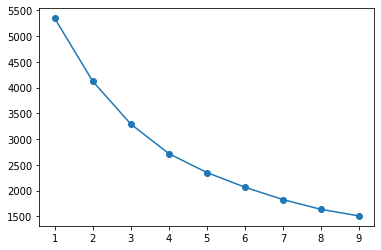

In [165]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_titanic_data )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
#plt.title( "Fig 5: Elbow Diagram");

In [166]:
  k = 4
  clusters = KMeans( k, random_state = 42 )
  clusters.fit( scaled_titanic_data )
  titanic_data["clusterid"] = clusters.labels_

In [169]:
titanic_data[titanic_data.clusterid == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
0,0,3,0,22.0,1,0,7.2500,0,0
4,0,3,0,35.0,0,0,8.0500,0,0
5,0,3,0,0.0,0,0,8.4583,0,0
12,0,3,0,20.0,0,0,8.0500,0,0
14,0,3,0,14.0,0,0,7.8542,0,0
...,...,...,...,...,...,...,...,...,...
882,0,3,0,22.0,0,0,10.5167,0,0
883,0,2,0,28.0,0,0,10.5000,0,0
884,0,3,0,25.0,0,0,7.0500,0,0
886,0,2,0,27.0,0,0,13.0000,0,0


In [170]:
titanic_data[titanic_data.clusterid == 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
7,0,3,0,2.0,3,1,21.0750,1,1
13,0,3,0,39.0,1,5,31.2750,1,1
16,0,3,0,2.0,4,1,29.1250,1,1
24,0,3,0,8.0,3,1,21.0750,1,1
25,1,3,1,38.0,1,5,31.3875,1,1
50,0,3,0,7.0,4,1,39.6875,1,1
59,0,3,0,11.0,5,2,46.9000,1,1
63,0,3,0,4.0,3,2,27.9000,1,1
68,1,3,1,17.0,4,2,7.9250,1,1
71,0,3,0,16.0,5,2,46.9000,1,1


In [171]:
titanic_data[titanic_data.clusterid == 2]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
2,1,3,1,26.0,0,0,7.9250,2,2
8,1,3,1,27.0,0,2,11.1333,2,2
9,1,2,1,14.0,1,0,30.0708,2,2
10,1,3,1,4.0,1,1,16.7000,2,2
15,1,2,1,55.0,0,0,16.0000,2,2
...,...,...,...,...,...,...,...,...,...
866,1,2,1,27.0,1,0,13.8583,2,2
869,1,3,1,4.0,1,1,11.1333,2,2
874,1,2,1,28.0,1,0,24.0000,2,2
875,1,3,1,15.0,0,0,7.2250,2,2


In [172]:
titanic_data[titanic_data.clusterid == 3]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
1,1,1,1,38.0,1,0,71.2833,3,3
3,1,1,1,35.0,1,0,53.1000,3,3
6,0,1,0,54.0,0,0,51.8625,3,3
11,1,1,1,58.0,0,0,26.5500,3,3
23,1,1,1,28.0,0,0,35.5000,3,3
...,...,...,...,...,...,...,...,...,...
867,0,1,0,31.0,0,0,50.4958,3,3
871,1,1,1,47.0,1,1,52.5542,3,3
879,1,1,1,56.0,0,1,83.1583,3,3
887,1,1,1,19.0,0,0,30.0000,3,3


In [173]:
titanic_data.groupby('clusterid')['Survived','Pclass','Sex','Age','SibSp','Parch','Fare'].agg(['mean','std'])

Survived              Pclass  ...     Parch       Fare           
               mean       std      mean  ...       std       mean        std
clusterid                                ...                                
0          0.000000  0.000000  2.695150  ...  0.353311  12.442858  10.309853
1          0.086207  0.283121  2.982759  ...  1.253187  35.891238  14.825556
2          1.000000  0.000000  2.509615  ...  0.713629  17.738441  11.815191
3          0.671875  0.470758  1.015625  ...  0.724008  91.327627  80.114390

[4 rows x 14 columns]